In [3]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import Image

In [4]:
mp_key = "8ChDIqwByRyXhuV8q0dfcUVnIxLTB4o7"
mp_id = "mp-961649"

In [5]:
with MPRester(mp_key) as m:
    #récupération de la structure 
    prim_struc = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
    el_dos = m.get_dos_by_material_id(mp_id)
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)
    ph_dos = m.get_phonon_dos_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure() #conventionelle
symmops = SpacegroupAnalyzer(conv_struc).get_space_group_operations() #operations du groupe

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [85]:
print(symmops) #permet de connaitre le groupe spatial
analyse=SpacegroupAnalyzer(prim_struc)
print(analyse.get_symmetry_operations()) #permet d'avoir les opérations de symétrie 
listeofsym = analyse.get_symmetry_operations()
print(len(listeofsym))

F-43m (216) spacegroup
[SymmOp(affine_matrix=array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])), SymmOp(affine_matrix=array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])), SymmOp(affine_matrix=array([[ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [-1., -1., -1.,  0.],
       [ 0.,  0.,  0.,  1.]])), SymmOp(affine_matrix=array([[ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [-1., -1., -1.,  0.],
       [ 0.,  0.,  0.,  1.]])), SymmOp(affine_matrix=array([[ 0.,  0.,  1.,  0.],
       [-1., -1., -1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.]])), SymmOp(affine_matrix=array([[ 0.,  0.,  1.,  0.],
       [-1., -1., -1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.]])), SymmOp(affine_matrix=array([[-1., -1., -1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.]])), SymmOp(affine_matrix=array([

Ici on obtient un des 230 groupes spatiaux ,en l'occurence ici un groupe symmorphique (donc sans composante de translation), avec le type de maille cubique, c'est une combinaison des 32 groupes ponctuels avec les différents types de maille.

In [133]:
sites = conv_struc.sites  #on obtient les positions des différents atomes dans notre maille conventionelle 
print(sites)

[PeriodicSite: Zr (3.061, 0.0, 1.875e-16) [0.5, 0.0, 0.0], PeriodicSite: Zr (3.061, 3.061, 3.061) [0.5, 0.5, 0.5], PeriodicSite: Zr (0.0, 0.0, 3.061) [0.0, 0.0, 0.5], PeriodicSite: Zr (4.923e-16, 3.061, 1.875e-16) [0.0, 0.5, 0.0], PeriodicSite: Fe (1.531, 1.531, 4.592) [0.25, 0.25, 0.75], PeriodicSite: Fe (1.531, 4.592, 1.531) [0.25, 0.75, 0.25], PeriodicSite: Fe (4.592, 1.531, 1.531) [0.75, 0.25, 0.25], PeriodicSite: Fe (4.592, 4.592, 4.592) [0.75, 0.75, 0.75], PeriodicSite: Te (0.0, 0.0, 0.0) [0.0, 0.0, 0.0], PeriodicSite: Te (4.923e-16, 3.061, 3.061) [0.0, 0.5, 0.5], PeriodicSite: Te (3.061, 0.0, 3.061) [0.5, 0.0, 0.5], PeriodicSite: Te (3.061, 3.061, 3.749e-16) [0.5, 0.5, 0.0]]


# Première opération de symmétrie sur Zr 

Je définis d'abord la symétrie que je vais effectuer

In [139]:
symm_1 = listeofsym[14]

print("Première opération de symétrie:")
print("(x, y, z) -> (" + str(symm_1.as_xyz_str())+ ")")

print("\nMatrice de Rotation:")
print(symm_1.rotation_matrix)

print("\nVecteur de translation:")
print(symm_1.translation_vector)

Première opération de symétrie:
(x, y, z) -> (z, y, x)

Matrice de Rotation:
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]

Vecteur de translation:
[0. 0. 0.]


Ensuite je vais regarder l'effet de cette symétrie sur un atome Zr choisi dans la liste sites ci-dessus

In [140]:
print("Coordonnées Zr avant symmétrie :")
positioninitiale_1 = [0.5, 0.0, 0.0]
print(positioninitiale_1)

print("\nCoordonnées Zr après opération :")
#on print la position de l'atome de Zr après l'opération de symmétrie
print(symm_1.operate(positioninitiale_1))

Coordonnées Zr avant symmétrie :
[0.5, 0.0, 0.0]

Coordonnées Zr après opération :
[0.  0.  0.5]


In [137]:
view = quick_view(conv_struc)
display(view) 
#attention on doit faire +1 a chauqe indice de symetrie et d'atome pour la visualisation
view.script('draw symop 15 {atomno = 1}')


JsmolView(layout=Layout(align_self='stretch', height='400px'))

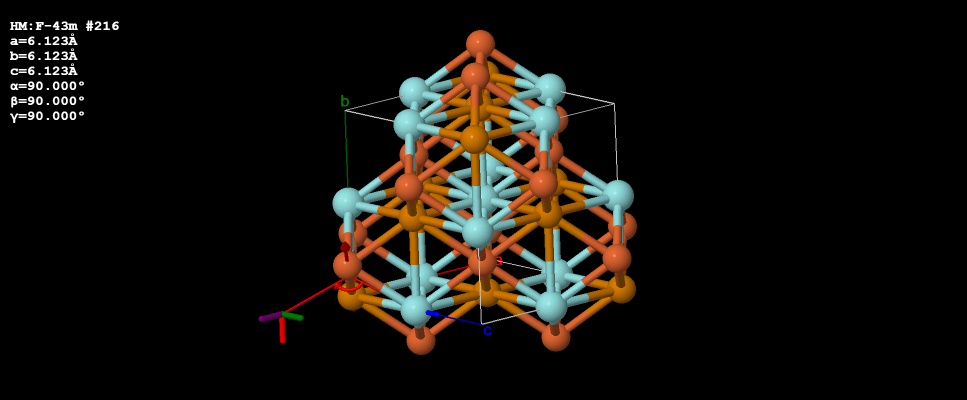

In [142]:
Image(filename='symm_1.png')

On observe que cette symétrie est une symmétrie miroir (notée m) par rapport au plan xz (101)

# Deuxième opération de symmétrie sur Fe

In [116]:
symm_2 = listeofsym[20]

print("Première opération de symétrie:")
print("(x, y, z) -> (" + str(symm_2.as_xyz_str())+ ")")

print("\nMatrice de Rotation:")
print(symm_2.rotation_matrix)

print("\nVecteur de translation:")
print(symm_2.translation_vector)


Première opération de symétrie:
(x, y, z) -> (y, z, x)

Matrice de Rotation:
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]

Vecteur de translation:
[0. 0. 0.]


In [117]:
print("Coordonnées Fe avant symmétrie :")
positioninitiale_2 = [0.25, 0.75, 0.25]
print(positioninitiale_2)

print("\nCoordonnées Fe après opération :")
#on print la position de l'atome de Fe après l'opération de symmétrie
print(symm_2.operate(positioninitiale_2))

Coordonnées Fe avant symmétrie :
[0.25, 0.75, 0.25]

Coordonnées Fe après opération :
[0.75 0.25 0.25]


In [145]:
view = quick_view(conv_struc)
display(view) 
view.script('draw symop 21 {atomno = 6}')

JsmolView(layout=Layout(align_self='stretch', height='400px'))

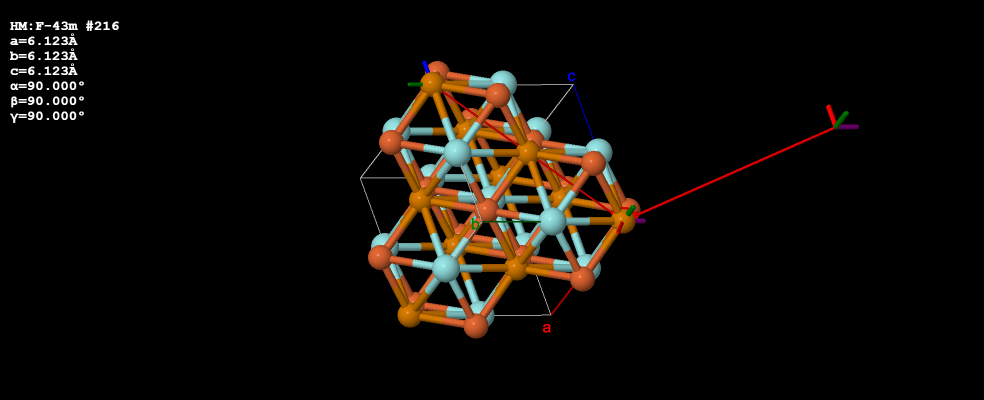

In [146]:
Image(filename='symm_2.png')

On observe que cette symétrie est une rotation d'ordre 3 (C3 donc rotation de 2pi/3) avec l'axe qui est parallèle a la  diagonale et passe par (0,0,0)

# Troisième opération de symmétrie sur Te 

In [130]:
symm_3 = listeofsym[2]

print("Première opération de symétrie:")
print("(x, y, z) -> (" + str(symm_3.as_xyz_str())+ ")")

print("\nMatrice de Rotation:")
print(symm_3.rotation_matrix)

print("\nVecteur de translation:")
print(symm_3.translation_vector)

Première opération de symétrie:
(x, y, z) -> (y, z, -x-y-z)

Matrice de Rotation:
[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [-1. -1. -1.]]

Vecteur de translation:
[0. 0. 0.]


In [131]:
print("Coordonnées Te avant symmétrie :")
positioninitiale_3 = [0.0, 0.5, 0.5]
print(positioninitiale_3)

print("\nCoordonnées Te après opération :")
#on print la position de l'atome de Te après l'opération de symmétrie
print(symm_3.operate(positioninitiale_3))

Coordonnées Te avant symmétrie :
[0.0, 0.5, 0.5]

Coordonnées Te après opération :
[ 0.5  0.5 -1. ]


In [148]:
view = quick_view(conv_struc)
display(view) 
view.script('draw symop 3 {atomno = 10}')

JsmolView(layout=Layout(align_self='stretch', height='400px'))

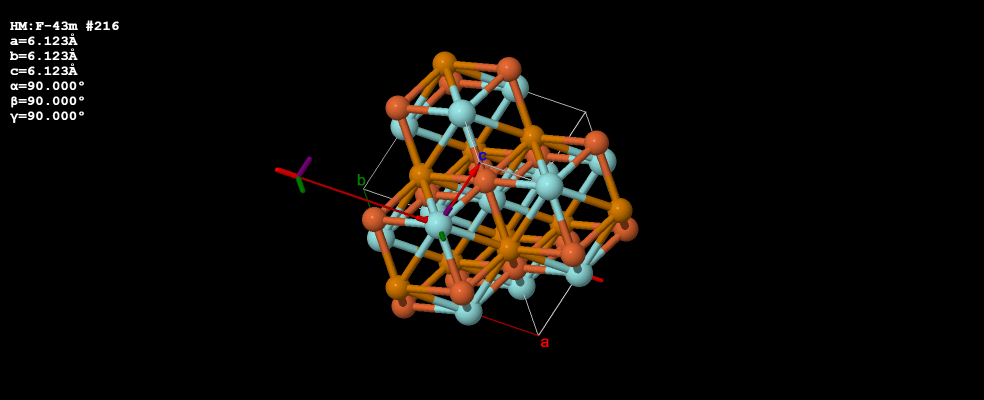

In [149]:
Image(filename='symm_3.png')

On observe que cette symétrie est une symétrie par un axe d'ordre 2 (axe de rotation C2 avec un angle de pi) qui est parallèle et confondu avec le vecteur de base c.